In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [2]:
# !pip install opencv-python

In [3]:
np.random.seed(1234)
directory="C:/Users/asad/practice/fruits-360_dataset/fruits-360/Training"
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])
       

In [4]:
directory2="C:/Users/asad/practice/fruits-360_dataset/fruits-360/Test"
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

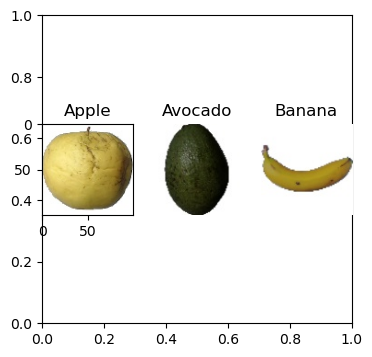

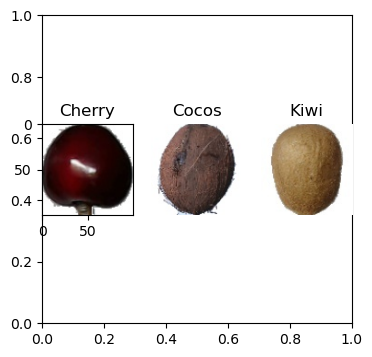

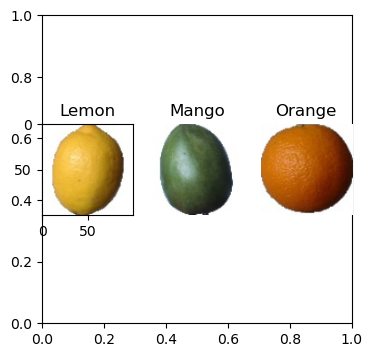

In [5]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]


fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(4,4))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    #plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

In [6]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [7]:
X_train.shape

(4306, 100, 100, 3)

In [8]:
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


In [9]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [10]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)


In [11]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau


# model=Sequential()
# #CNN
# model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.35))

# model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.35))

# model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.35))
# #MLP
# model.add(Flatten())
# model.add(Dense(512,activation="relu"))
# model.add(Dropout(0.5))
# model.add(Dense(9,activation="softmax"))
# #defining optimizer
# optimizer='Adam'#(lr=0.001,beta_1=0.9,beta_2=0.999)
# #compile the model
# model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

# epochs=30
# batch_size=4


model = tf.keras.models.Sequential([
    #1st convo block
    tf.keras.layers.Conv2D(64, (3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(100,100,3)),
    tf.keras.layers.Conv2D(64, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),
#2nd convo bock
    tf.keras.layers.Conv2D(128, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(128, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
   # tf.keras.layers.Dropout(0.2),
    #3rd convo block
     tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(256, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    #tf.keras.layers.Dropout(0.2),
#4th conco block
     tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
   #tf.keras.layers.Dropout(0.2),
    #5th convo block
    
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.Conv2D(512, (3,3),activation='relu', padding='same',kernel_initializer='he_uniform'),
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
    

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(4096,activation='relu'),
   #tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(4096,activation='relu'),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(9, activation='softmax')
      
   
    
])

In [12]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=4),epochs=30,
                            validation_data=(x_val,y_val)
                           )

Epoch 1/30
861/861 [==============================] - 50s 50ms/step - loss: 4.0412 - accuracy: 0.1031 - val_loss: 2.1968 - val_accuracy: 0.1021
Epoch 2/30
861/861 [==============================] - 41s 47ms/step - loss: 2.1973 - accuracy: 0.1167 - val_loss: 2.1966 - val_accuracy: 0.1021
Epoch 3/30
861/861 [==============================] - 41s 47ms/step - loss: 2.1972 - accuracy: 0.1167 - val_loss: 2.1965 - val_accuracy: 0.1021
Epoch 4/30
861/861 [==============================] - 41s 47ms/step - loss: 2.1970 - accuracy: 0.1095 - val_loss: 2.1966 - val_accuracy: 0.1021
Epoch 5/30
861/861 [==============================] - 41s 47ms/step - loss: 2.1970 - accuracy: 0.1124 - val_loss: 2.1966 - val_accuracy: 0.1021
Epoch 6/30
861/861 [==============================] - 41s 47ms/step - loss: 2.1970 - accuracy: 0.1159 - val_loss: 2.1966 - val_accuracy: 0.1021
Epoch 7/30
861/861 [==============================] - 41s 47ms/step - loss: 2.1970 - accuracy: 0.1141 - val_loss: 2.1966 - val_accuracy:

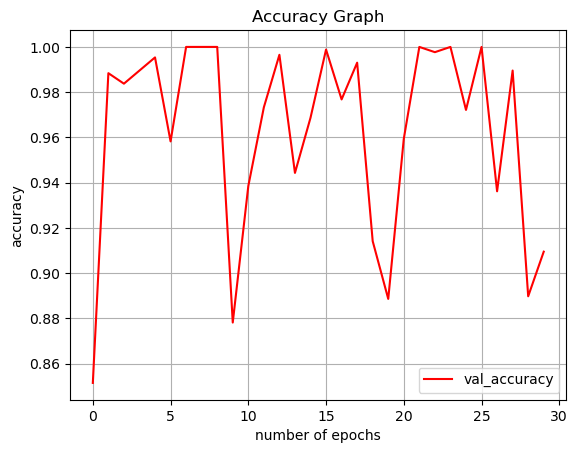

In [12]:
plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

27/27 [==============================] - 0s 9ms/step


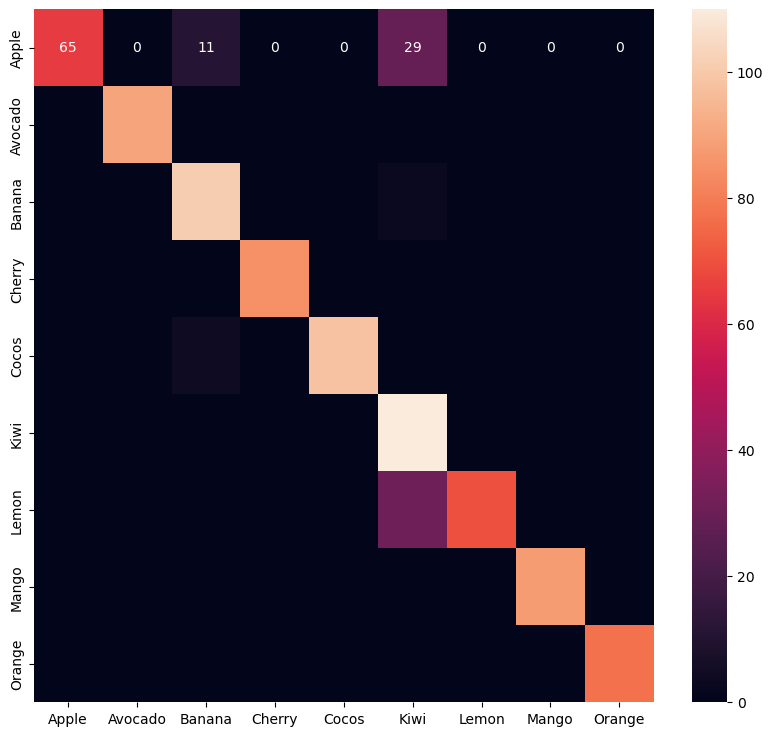

In [13]:
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()